In [1]:
# Importing the Keras libraries and packages
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from numpy.random import seed
import os
import random


In [2]:
# seed = 2
# def reset_random_seeds():
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     tensorflow.random.set_seed(seed)
#     np.random.seed(seed)
#     random.seed(seed)

In [8]:
# Part 1 - Develop a Baseline CNN Model

# A baseline model will show us a minimal model performance 
# to which other models will be compared


img_rows = 128
img_cols = 128
epochs = 35
batch_size = 64
num_of_train_samples = 3360
num_of_test_samples = 1440

In [4]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    pyplot.figure(figsize=(10,5))
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='blue', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('\nClassification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='blue', label='test')
    pyplot.legend()
    # save plot to file
#     filename = sys.argv[0].split('/')[-1]
#     pyplot.savefig(filename + '_plot.png')
#     pyplot.close()
    pyplot.show()

In [5]:
# Function that calculates Confusion Matrix and shows Classification Report
def class_report(test_set, model):
    Y_pred = model.predict(test_set, num_of_test_samples // batch_size + 1)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_set.classes, y_pred))
    print('Classification Report')
    target_names = list(training_set.class_indices.keys())
    print(classification_report(test_set.classes, y_pred, target_names=target_names))

In [6]:
import splitfolders #link - https://pypi.org/project/split-folders/

# Divide all artists folders to train and val folders
splitfolders.ratio("./artists", output="./", seed=42 , ratio=(.7, .3))

Copying files: 4800 files [00:04, 1106.53 files/s]


In [25]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255)

training_set = datagen.flow_from_directory('train', 
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [26]:
print(test_set.class_indices)

{'Matisse': 0, 'Monet': 1, 'Pissaro': 2, 'Renoir': 3, 'Sargent': 4, 'VanGogh': 5}


In [27]:
# VGG Blocks
# The basic building block of classic CNNs is a sequence of the following: 
#     (i) a convolutional layer with padding to maintain the resolution, 
#     (ii) a nonlinearity such as a ReLU, 
#     (iii) a pooling layer such as a max pooling layer. 
# One VGG block consists of a sequence of convolutional layers, 
# followed by a max pooling layer for spatial downsampling. 
# In the original VGG paper [Simonyan & Zisserman, 2014], the authors employed convolutions with  3×3  kernels 
# with padding of 1 (keeping height and width) 
# and  2×2  max pooling with stride of 2 (halving the resolution after each block). 

In [28]:
# Define CNN model with one VGG-style block
# The 1-block VGG model has a single convolutional layer with 32 filters 
# followed by a max pooling layer
def baseline_model_1():
    #reset_random_seeds()
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

<h3>Baseline model with 1 VGG block without dropout</h3>


In [29]:
# The model will be fit for 35 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_1()
# Fit model
history = model.fit_generator(training_set, 
                              steps_per_epoch=len(training_set), # = num_of_train_samples // batch_size +1
                              validation_data=test_set, 
                              validation_steps=len(test_set), # = num_of_test_samples // batch_size +1
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 19s 345ms/step - loss: 2.1140 - accuracy: 0.1857 - val_loss: 1.7105 - val_accuracy: 0.2715
Epoch 2/35
53/53 [==============================] - 18s 341ms/step - loss: 1.6784 - accuracy: 0.2689 - val_loss: 1.6346 - val_accuracy: 0.3049
Epoch 3/35
53/53 [==============================] - 18s 339ms/step - loss: 1.5612 - accuracy: 0.3433 - val_loss: 1.5695 - val_accuracy: 0.3653
Epoch 4/35
53/53 [==============================] - 18s 338ms/step - loss: 1.5107 - accuracy: 0.4050 - val_loss: 1.5351 - val_accuracy: 0.3736
Epoch 5/35
53/53 [==============================] - 19s 367ms/step - loss: 1.4499 - accuracy: 0.4192 - val_loss: 1.5140 - val_accuracy: 0.3903
Epoch 6/35
53/53 [==============================] - 18s 334ms/step - loss: 1.4196 - accuracy: 0.4304 - val_loss: 1.6536 - val_accuracy: 0.3313
Epoch 7/35
53/53 [==============================] - 18s 336ms/step - loss: 1.4441 - accuracy: 0.4257 - val_loss: 1.4878 - val_accuracy: 0.4028

In [30]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 54.3750


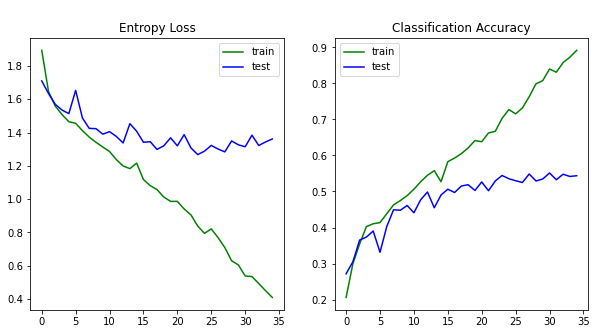

In [31]:
# Build graphs
summarize_diagnostics(history)

In [32]:
class_report(test_set, model)

Confusion Matrix
[[130  51  10  15  22  12]
 [  8 160  26   9  11  26]
 [  7  60 136  15   5  17]
 [ 16  22  21 123  35  23]
 [ 23  47  11  20 125  14]
 [ 12  46  26  21  26 109]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.66      0.54      0.60       240
       Monet       0.41      0.67      0.51       240
     Pissaro       0.59      0.57      0.58       240
      Renoir       0.61      0.51      0.56       240
     Sargent       0.56      0.52      0.54       240
     VanGogh       0.54      0.45      0.49       240

    accuracy                           0.54      1440
   macro avg       0.56      0.54      0.55      1440
weighted avg       0.56      0.54      0.55      1440



<h3>Baseline model with 2 VGG blocks without dropout</h3>


In [33]:
# Define CNN model with two VGG-style blocks
def baseline_model_2():
   # reset_random_seeds()
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# define model
model = baseline_model_2()
# fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 30, 
                              verbose = 0)

In [35]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 55.5556


In [36]:
class_report(test_set, model)

Confusion Matrix
[[139   9  10  41  15  26]
 [ 12 139  31  11  10  37]
 [ 18  22 133  29   5  33]
 [ 22  10  15 153  14  26]
 [ 48  10  14  51 101  16]
 [ 16  16  35  25  13 135]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.55      0.58      0.56       240
       Monet       0.67      0.58      0.62       240
     Pissaro       0.56      0.55      0.56       240
      Renoir       0.49      0.64      0.56       240
     Sargent       0.64      0.42      0.51       240
     VanGogh       0.49      0.56      0.53       240

    accuracy                           0.56      1440
   macro avg       0.57      0.56      0.56      1440
weighted avg       0.57      0.56      0.56      1440



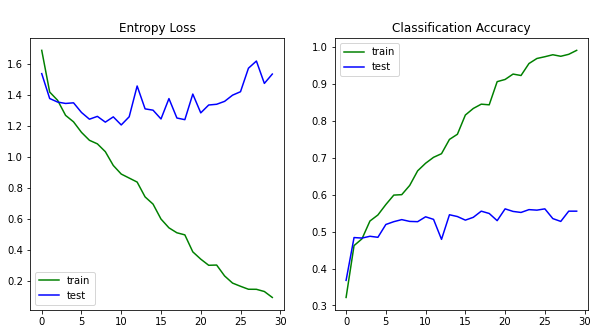

In [37]:
# Build graphs
summarize_diagnostics(history)

<h3>Baseline model with 3 VGG blocks without dropout</h3>


In [38]:
# Define CNN model with three VGG-style blocks
def baseline_model_3():
    #reset_random_seeds()
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
# 3d block
    model.add(Conv2D(128, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape= (img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [39]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_3()
# Fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 30)

Epoch 1/30
53/53 [==============================] - 39s 729ms/step - loss: 1.9867 - accuracy: 0.2299 - val_loss: 1.5857 - val_accuracy: 0.3417
Epoch 2/30
53/53 [==============================] - 38s 721ms/step - loss: 1.5481 - accuracy: 0.4025 - val_loss: 1.5672 - val_accuracy: 0.3611
Epoch 3/30
53/53 [==============================] - 40s 748ms/step - loss: 1.4497 - accuracy: 0.4265 - val_loss: 1.3631 - val_accuracy: 0.5007
Epoch 4/30
53/53 [==============================] - 41s 765ms/step - loss: 1.3197 - accuracy: 0.5067 - val_loss: 1.3331 - val_accuracy: 0.5014
Epoch 5/30
53/53 [==============================] - 41s 766ms/step - loss: 1.2888 - accuracy: 0.5229 - val_loss: 1.3639 - val_accuracy: 0.4743
Epoch 6/30
53/53 [==============================] - 42s 795ms/step - loss: 1.2608 - accuracy: 0.5329 - val_loss: 1.2899 - val_accuracy: 0.5215
Epoch 7/30
53/53 [==============================] - 41s 765ms/step - loss: 1.1867 - accuracy: 0.5587 - val_loss: 1.2574 - val_accuracy: 0.5201

In [40]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 58.8194


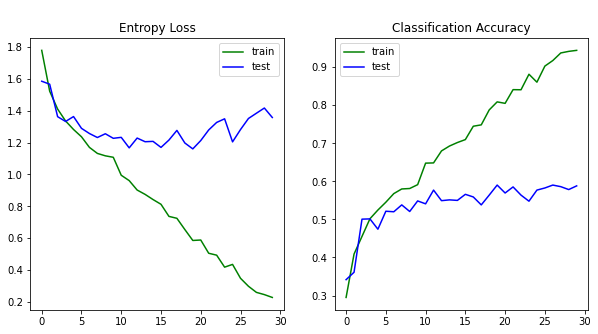

In [41]:
# Build graphs
summarize_diagnostics(history)

In [42]:
class_report(test_set, model)

Confusion Matrix
[[160   4  10  28  18  20]
 [ 12 127  37  13  13  38]
 [ 18  15 135  20   6  46]
 [ 17   8  12 160  23  20]
 [ 40   3  14  36 130  17]
 [ 15  10  34  26  20 135]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.61      0.67      0.64       240
       Monet       0.76      0.53      0.62       240
     Pissaro       0.56      0.56      0.56       240
      Renoir       0.57      0.67      0.61       240
     Sargent       0.62      0.54      0.58       240
     VanGogh       0.49      0.56      0.52       240

    accuracy                           0.59      1440
   macro avg       0.60      0.59      0.59      1440
weighted avg       0.60      0.59      0.59      1440



In [43]:
# Part 2 - Add Dropout Regularization and Data Augmentation
# to our Baseline model step by step and evaluate an efficiency  
# ___________________________________________________________


# 1 step - Add Dropout

<h3>Model with 3 VGG blocks with dropout</h3>

In [44]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255)

training_set = datagen.flow_from_directory('train', 
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [45]:
# Define CNN model with Dropout Regularization
def model_with_dropout():
    #reset_random_seeds()
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   
   
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   

    model.add(Conv2D(128, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape= (img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
    
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [46]:
# The model will be fit for 35 epochs - to check if the model can learn the problem.
# Define model
model_d = model_with_dropout()
# Fit model
history = model_d.fit_generator(training_set, steps_per_epoch=len(training_set),
                                validation_data=test_set,
                                validation_steps=len(test_set), 
                                epochs= epochs)

Epoch 1/35
53/53 [==============================] - 39s 725ms/step - loss: 1.8930 - accuracy: 0.1958 - val_loss: 1.7151 - val_accuracy: 0.2861
Epoch 2/35
53/53 [==============================] - 38s 720ms/step - loss: 1.7257 - accuracy: 0.2424 - val_loss: 1.6637 - val_accuracy: 0.2715
Epoch 3/35
53/53 [==============================] - 38s 723ms/step - loss: 1.6878 - accuracy: 0.2789 - val_loss: 1.6007 - val_accuracy: 0.3500
Epoch 4/35
53/53 [==============================] - 39s 730ms/step - loss: 1.6356 - accuracy: 0.2901 - val_loss: 1.5867 - val_accuracy: 0.3417
Epoch 5/35
53/53 [==============================] - 40s 762ms/step - loss: 1.6136 - accuracy: 0.2976 - val_loss: 1.5770 - val_accuracy: 0.4243
Epoch 6/35
53/53 [==============================] - 40s 753ms/step - loss: 1.5816 - accuracy: 0.3426 - val_loss: 1.4951 - val_accuracy: 0.4465
Epoch 7/35
53/53 [==============================] - 38s 721ms/step - loss: 1.5522 - accuracy: 0.3685 - val_loss: 1.5153 - val_accuracy: 0.4139

In [47]:
# Evaluate model
_, acc = model_d.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 56.8056


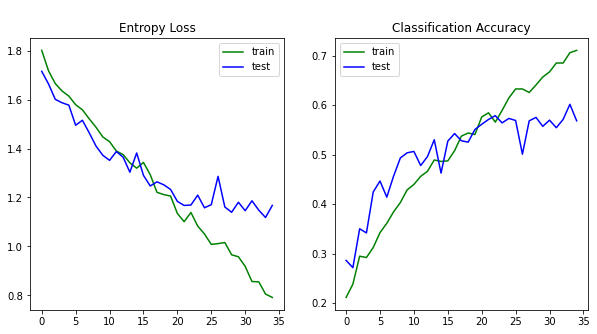

In [48]:
# Build graphs
summarize_diagnostics(history)

In [ ]:
# As we see model overfitts less after usage of dropout

In [49]:
class_report(test_set, model_d)

Confusion Matrix
[[174  27   4   4  13  18]
 [  7 167  22   3   7  34]
 [ 18  50 112   3   4  53]
 [ 22  19  30 103  28  38]
 [ 46  33  13  13 113  22]
 [ 21  35  10  10  15 149]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.60      0.72      0.66       240
       Monet       0.50      0.70      0.58       240
     Pissaro       0.59      0.47      0.52       240
      Renoir       0.76      0.43      0.55       240
     Sargent       0.63      0.47      0.54       240
     VanGogh       0.47      0.62      0.54       240

    accuracy                           0.57      1440
   macro avg       0.59      0.57      0.56      1440
weighted avg       0.59      0.57      0.56      1440



In [50]:
# 2 step - Add Data augmentation
# Use our model with dropout

<h3>Model with 3 VGG blocks with dropout and data augmentation</h3>


<h4>Trained for 35 epochs</h4>


In [51]:
# Create data generators 
# Train generator with data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [52]:
# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [53]:
# Define model
model1 = model_with_dropout()
# Fit model
history = model1.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 43s 795ms/step - loss: 1.8587 - accuracy: 0.1924 - val_loss: 1.6800 - val_accuracy: 0.3167
Epoch 2/35
53/53 [==============================] - 41s 763ms/step - loss: 1.6954 - accuracy: 0.2624 - val_loss: 1.5971 - val_accuracy: 0.3986
Epoch 3/35
53/53 [==============================] - 40s 752ms/step - loss: 1.6354 - accuracy: 0.3268 - val_loss: 1.5288 - val_accuracy: 0.4424
Epoch 4/35
53/53 [==============================] - 41s 765ms/step - loss: 1.6327 - accuracy: 0.3401 - val_loss: 1.5021 - val_accuracy: 0.4396
Epoch 5/35
53/53 [==============================] - 41s 779ms/step - loss: 1.5733 - accuracy: 0.3511 - val_loss: 1.4806 - val_accuracy: 0.4437
Epoch 6/35
53/53 [==============================] - 49s 923ms/step - loss: 1.5594 - accuracy: 0.3820 - val_loss: 1.4980 - val_accuracy: 0.4521
Epoch 7/35
53/53 [==============================] - 48s 904ms/step - loss: 1.5288 - accuracy: 0.3919 - val_loss: 1.4346 - val_accuracy: 0.4764

In [54]:
# Evaluate model
_, acc = model1.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 54.7917


In [56]:
class_report(test_set, model1)

Confusion Matrix
[[164   5   9   1  16  45]
 [  4  94  50   0  14  78]
 [  9   9 143   1   5  73]
 [ 22   2  34  69  43  70]
 [ 50   5  10   4 128  43]
 [ 13   4  22   0  10 191]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.63      0.68      0.65       240
       Monet       0.79      0.39      0.52       240
     Pissaro       0.53      0.60      0.56       240
      Renoir       0.92      0.29      0.44       240
     Sargent       0.59      0.53      0.56       240
     VanGogh       0.38      0.80      0.52       240

    accuracy                           0.55      1440
   macro avg       0.64      0.55      0.54      1440
weighted avg       0.64      0.55      0.54      1440



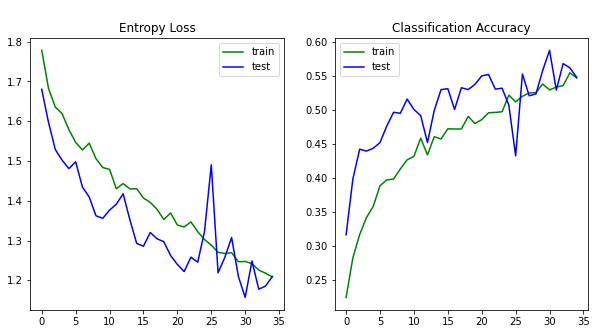

In [55]:
# Build graphs
summarize_diagnostics(history)

In [ ]:
# As we see from out graphs number of epochs could be increased to higher than 35 epochs

<h4>Trained for 50 epochs</h4>


In [ ]:
# Let's check how modek learns after 50 epochs

In [57]:
# Create data generators 
# Train generator with data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')
# Define model
model50 = model_with_dropout()
# Fit model
history = model50.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 50)

Epoch 1/50
53/53 [==============================] - 48s 889ms/step - loss: 1.8340 - accuracy: 0.2161 - val_loss: 1.6630 - val_accuracy: 0.3688
Epoch 2/50
53/53 [==============================] - 41s 763ms/step - loss: 1.6916 - accuracy: 0.2810 - val_loss: 1.6091 - val_accuracy: 0.3986
Epoch 3/50
53/53 [==============================] - 42s 785ms/step - loss: 1.6664 - accuracy: 0.3160 - val_loss: 1.5569 - val_accuracy: 0.4139
Epoch 4/50
53/53 [==============================] - 42s 796ms/step - loss: 1.6505 - accuracy: 0.3353 - val_loss: 1.5367 - val_accuracy: 0.4257
Epoch 5/50
53/53 [==============================] - 42s 795ms/step - loss: 1.6290 - accuracy: 0.3298 - val_loss: 1.5351 - val_accuracy: 0.4250
Epoch 6/50
53/53 [==============================] - 41s 770ms/step - loss: 1.5817 - accuracy: 0.3610 - val_loss: 1.5082 - val_accuracy: 0.4521
Epoch 7/50
53/53 [==============================] - 41s 774ms/step - loss: 1.5935 - accuracy: 0.3641 - val_loss: 1.4731 - val_accuracy: 0.4549

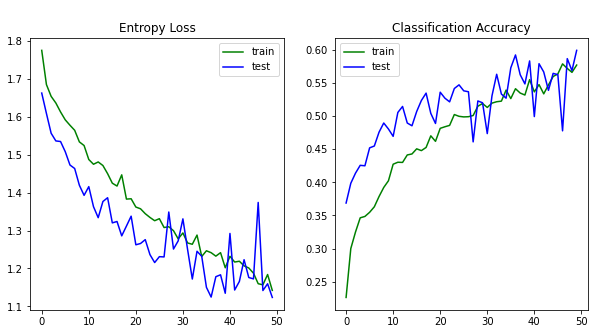

In [58]:
# Build graphs
summarize_diagnostics(history)

In [60]:
# Evaluate model
_, acc = model50.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 59.9306


<h4>Trained for 50 epochs with different data augmentation</h4>


In [61]:
# Version with different data augmentation to check accuracy

# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model50 = model_with_dropout()
# Fit model
history = model50.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 50)

Epoch 1/50
53/53 [==============================] - 45s 808ms/step - loss: 1.8772 - accuracy: 0.1794 - val_loss: 1.6952 - val_accuracy: 0.2972
Epoch 2/50
53/53 [==============================] - 43s 813ms/step - loss: 1.7312 - accuracy: 0.2408 - val_loss: 1.6415 - val_accuracy: 0.3257
Epoch 3/50
53/53 [==============================] - 43s 799ms/step - loss: 1.6881 - accuracy: 0.2813 - val_loss: 1.5934 - val_accuracy: 0.3889
Epoch 4/50
53/53 [==============================] - 42s 790ms/step - loss: 1.6434 - accuracy: 0.3226 - val_loss: 1.5579 - val_accuracy: 0.4208
Epoch 5/50
53/53 [==============================] - 42s 792ms/step - loss: 1.6139 - accuracy: 0.3356 - val_loss: 1.5136 - val_accuracy: 0.4458
Epoch 6/50
53/53 [==============================] - 41s 765ms/step - loss: 1.5931 - accuracy: 0.3676 - val_loss: 1.5409 - val_accuracy: 0.4187
Epoch 7/50
53/53 [==============================] - 42s 783ms/step - loss: 1.5887 - accuracy: 0.3611 - val_loss: 1.4546 - val_accuracy: 0.4736

In [62]:
# Evaluate model
_, acc = model50.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 61.4583


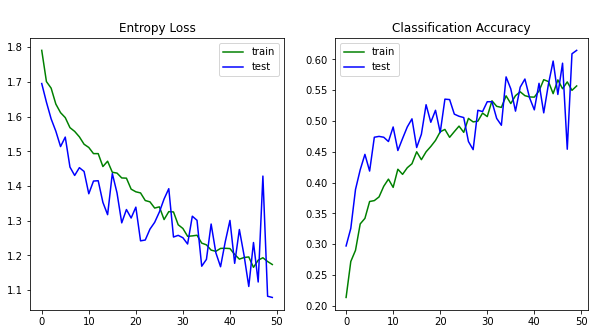

In [63]:
# Build graphs
summarize_diagnostics(history)

In [ ]:
# So we see that change of data augmentaion approach improved our accuracy

<h4>Trained for 50 epochs and bigger size of pictures (224*224px)</h4>

In [73]:
# Let's try to change pictures size from 128 to 224 and check accuracy
# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

img_rows = 224
img_cols = 224
# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model224 = model_with_dropout()
# Fit model
history = model224.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= 50)

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/50
53/53 [==============================] - 128s 2s/step - loss: 1.8221 - accuracy: 0.2036 - val_loss: 1.6638 - val_accuracy: 0.3354
Epoch 2/50
53/53 [==============================] - 128s 2s/step - loss: 1.6753 - accuracy: 0.2994 - val_loss: 1.5774 - val_accuracy: 0.3653
Epoch 3/50
53/53 [==============================] - 127s 2s/step - loss: 1.6048 - accuracy: 0.3506 - val_loss: 1.5210 - val_accuracy: 0.4354
Epoch 4/50
53/53 [==============================] - 130s 2s/step - loss: 1.5792 - accuracy: 0.3592 - val_loss: 1.4641 - val_accuracy: 0.4701
Epoch 5/50
53/53 [==============================] - 130s 2s/step - loss: 1.5374 - accuracy: 0.3857 - val_loss: 1.4301 - val_accuracy: 0.4715
Epoch 6/50
53/53 [==============================] - 128s 2s/step - loss: 1.5021 - accuracy: 0.3974 - val_loss: 1.4329 - val_accuracy: 0.4826
Epoch 7/50
53/53 [==============================] - 132s 2s/step - los

In [74]:
# Evaluate model
_, acc = model224.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 59.8611


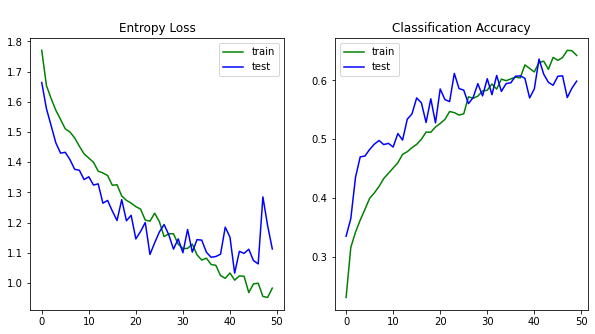

In [75]:
# Build graphs
summarize_diagnostics(history)

<h3>Model with a bit different architecture of VGG blocks, dropout, data augmentation</h3>
<h4>Trained for 35 epochs and small size of pictures (128*128px)</h4>

In [ ]:
# Let's try out a bit different architecture with VGG blocks

In [68]:
# Define CNN model with Dropout Regularization
img_rows = 128
img_cols = 128
def model_blocks():
    #reset_random_seeds()
    model = Sequential()
   
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu',
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
   
   
    model.add(Conv2D(128, (3, 3), activation='relu', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))

    model.add(Conv2D(128, (3, 3), activation='relu', 
                     padding='same', input_shape= (img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    
    
    model.add(Conv2D(256, (3, 3), activation='relu', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))

    model.add(Conv2D(256, (3, 3), activation='relu',  
                     padding='same', input_shape= (img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    
    
   
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [69]:
# Version with different data augmentation to check accuracy

# Create data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create sets
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('val',
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle = False,
                                            class_mode='categorical')

# Define model
model_blocks = model_blocks()
# Fit model
history = model_blocks.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs)

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.
Epoch 1/35
53/53 [==============================] - 312s 6s/step - loss: 1.7927 - accuracy: 0.1547 - val_loss: 1.7810 - val_accuracy: 0.2340
Epoch 2/35
53/53 [==============================] - 307s 6s/step - loss: 1.7772 - accuracy: 0.2095 - val_loss: 1.7596 - val_accuracy: 0.2736
Epoch 3/35
53/53 [==============================] - 300s 6s/step - loss: 1.7473 - accuracy: 0.2797 - val_loss: 1.6845 - val_accuracy: 0.3076
Epoch 4/35
53/53 [==============================] - 301s 6s/step - loss: 1.6718 - accuracy: 0.3198 - val_loss: 1.5977 - val_accuracy: 0.3285
Epoch 5/35
53/53 [==============================] - 301s 6s/step - loss: 1.6167 - accuracy: 0.3238 - val_loss: 1.5639 - val_accuracy: 0.3653
Epoch 6/35
53/53 [==============================] - 302s 6s/step - loss: 1.5877 - accuracy: 0.3576 - val_loss: 1.5484 - val_accuracy: 0.3854
Epoch 7/35
53/53 [==============================] - 300s 6s/step - los

In [70]:
# Evaluate model
_, acc = model_blocks.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 57.6389


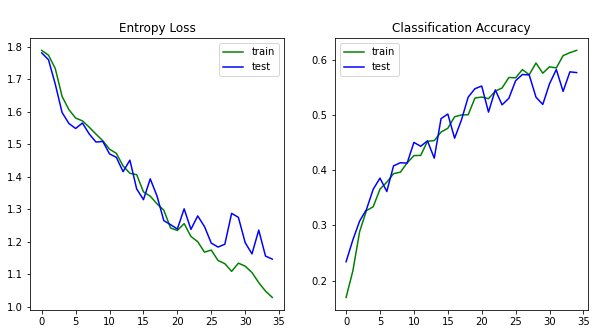

In [71]:
# Build graphs
summarize_diagnostics(history)

In [ ]:
# The inception module was described and used in the GoogLeNet model in the 2015 paper by
# Christian Szegedy, et al. titled Going Deeper with Convolutions

In [ ]:
# HERE WILL BE model with inception blocks